###  **MINOR PROJECT**


*   Perform regression analysis to predict the real estate prices by taking all the input 
parameters(multi linear regression).
*   Also plot visuals by using Matplotlib/Seaborn data visualization comparing the different 
features of the input parameters and do Exploratory data analysis (EDA) by using pandas.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt


1. **Taking the Data and creating a dataframe**

In [3]:
df = pd.read_csv('/content/Real estate.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
df.shape

(414, 8)

In [5]:
df.size

3312

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:
df.head(8)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7


In [8]:
df.corr()['Y house price of unit area']

No                                       -0.028587
X1 transaction date                       0.087491
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
Y house price of unit area                1.000000
Name: Y house price of unit area, dtype: float64

2. **Preprocessing and cleaning the dataset for better accuracy.**

The 'No' column doesn't seem to have a direct correlation on 'Y house price of unit area'
thus dropping it

In [9]:
df1 = df.drop(['No'], axis = 1)
df1.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
df1.shape

(414, 7)

3. **Performing Exploratory Data Analysis and Data Visualization**

In [11]:
import numpy as np

In [12]:
v1 = np.max(df1['X2 house age']) ##maximum house age
v1

43.8

In [13]:
v2 = np.min(df1['X2 house age']) ##minimum house age
v2

0.0

In [14]:
v3 = np.max(df1['X4 number of convenience stores']) ##maximum no. of convenience store
v3

10

In [15]:
v4 = np.min(df1['X4 number of convenience stores']) ##minimum no. of convenience store
v4

0

In [16]:
v5 = np.max(df1['Y house price of unit area']) ##maximum price per unit area of house
v5

117.5

In [17]:
v6 = np.min(df1['Y house price of unit area']) ##minimum price per unit area of house
v6

7.6

In [18]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


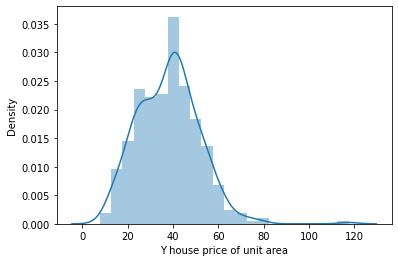

In [19]:
sns.distplot(df1['Y house price of unit area'])  ##finding out in which range the majority of houses are priced at

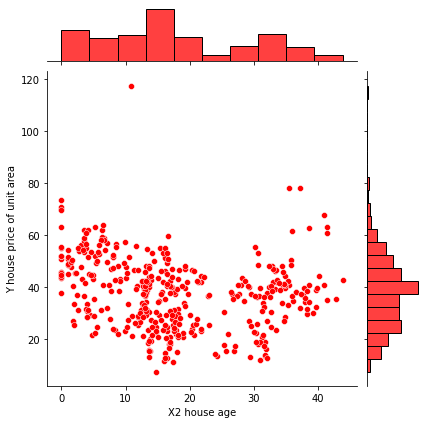

In [20]:
##relation of house age with house prices
sns.jointplot(x='X2 house age', y='Y house price of unit area', color = 'red', data=df1)

<function matplotlib.pyplot.show>

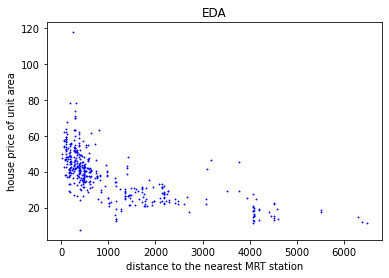

<Figure size 4320x1440 with 0 Axes>

In [21]:
p = df1['X3 distance to the nearest MRT station']
q = df1['Y house price of unit area']
fig_dim = (20,8)
plt.scatter(p, q, marker = '*', color = 'blue',  s=1)
plt.xlabel('distance to the nearest MRT station')
plt.ylabel('house price of unit area')
plt.title('EDA')
plt.figure(figsize=(60, 20))
plt.show


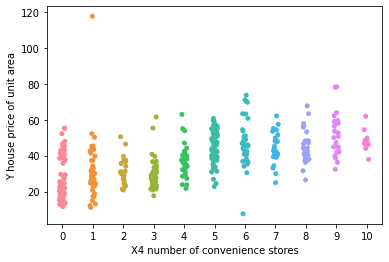

In [22]:
sns.stripplot(x='X4 number of convenience stores', y='Y house price of unit area', data=df1)

4. **Divide into Input and Output**

In [23]:
x = df1.iloc[:,0:6]
y = df1.iloc[:,6]

5. **Train and Test Variables**

In [24]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0, test_size=0.2)

6. **Fitting and running the ML model**

In [25]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression() 
model.fit(x_train,y_train)    
y_pred = model.predict(x_test)
y_pred

array([40.09548022, 12.83819172, 42.00966923, 12.64733002, 42.44343803,
       39.83198984, 40.55595745, 33.86023762, 49.37328265, 45.87031976,
       45.86310332, 40.64517161, 39.50676203, 40.04955455, 47.11860745,
       38.13995857, 40.08417262, 41.12540438, 40.83964717, 42.37860913,
       49.70003677, 31.08231285, 39.67622569, 45.52764709, 46.18872415,
       43.43143246, 46.35880414, 26.20749681, 48.13688227, 21.53997799,
       44.8104349 , 34.94131598, 42.6644548 , 38.37379621, 43.98018394,
       32.28477958, 47.62406077, 39.77407301, 52.55712201,  7.46443039,
       52.54110472, 33.1285138 , 34.22107416, 49.59242876, 15.37567885,
       43.36042455, 42.40643117, 12.9983919 , 33.99155573, 48.50179814,
       53.67150141, 38.73047082, 47.73879852, 25.42163729, 30.68691477,
       34.27187582, 48.91161249, 40.61983209, 43.45816985, 32.95307348,
       43.85237072, 43.62659423, 39.55165632, 47.0209757 , 36.84017788,
       30.00963218,  9.66438363, 34.92190591, 46.16892784, 39.83

In [26]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

7. **Predicting a value**

In [27]:
y_pred1 = model.predict([[2012.917,	19.5,	306.59470,	9,	24.98034,	121.53951]])
y_pred1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([47.73879852])

8. **Evaluation : r2 score**

In [28]:
from sklearn.metrics import r2_score 
r2_score(y_test,y_pred)

0.6573242742217936

got accuracy score of 65.7%